# **1 - Define the Problem**

This is a simulated dataset exploring how lifestyle habits affect academic performance in students

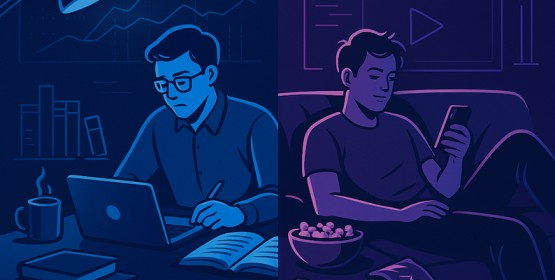

# **2 - Import Libraries and Read the Data**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load data
df=pd.read_csv(r'/content/student_habits_performance.csv')

#display sample of data
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

# **3 - Exploratory Data Analysis (EDA) and Visualization**
Summary of the dataset and understand each feature

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

What we detect from this code:

1-We have 15 feature

2-1000 datapoint

3-categorical data

4-missing data(nulls)





In [7]:
# Summary statistics
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


What we detect from this code:

1- ِAge range 17-24 , they are collegee

2- Students study an average of 3.55 hours per day, with some studying 0 hours.

3- On average, students spend 2.5 hours daily on social media

4- Overall attendance is high (average ≈ 84%)

5- exercise_frequency Frequency ranges from 0 to 6 times per week

6- mental_health_rating Rated from 1 to 10, the average is 5.4

7- The average exam score is about 69.6, with a standard deviation of ~16.9, showing wide variation in performance






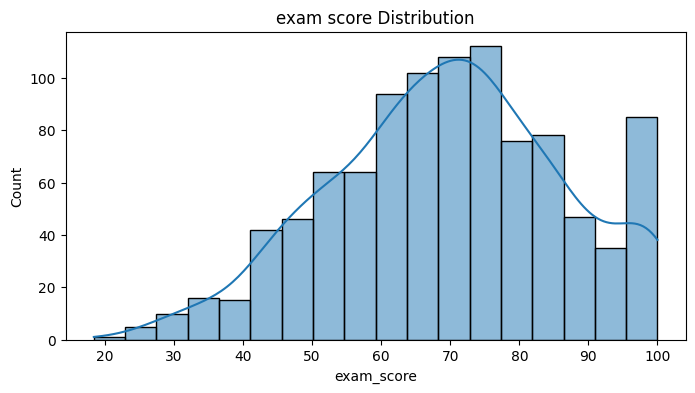

In [8]:
# Histogram for exam_score(Target)
plt.figure(figsize=(8,4))
sns.histplot(df['exam_score'], kde=True)
plt.title("exam score Distribution")
plt.show()

We have here Negative skewness, where  mean < median

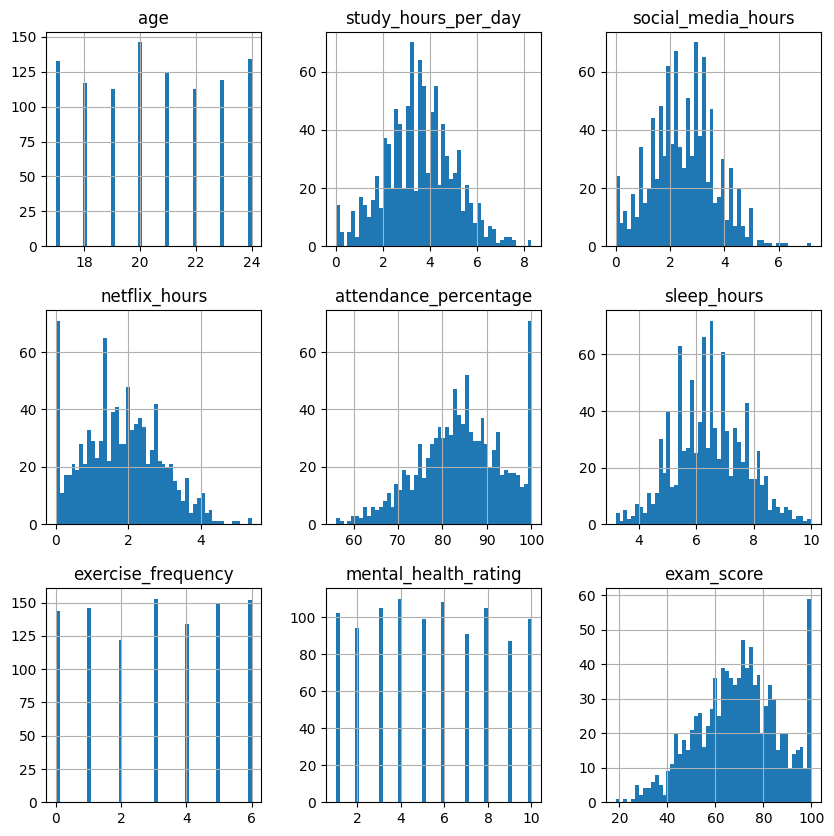

In [9]:
df.hist(bins=50, figsize=(10, 10))
plt.show()

In [10]:
# We must split data to numerical and categorical to make correlation
categorical_columns=df.select_dtypes(['object'])
numaric_columns=df.select_dtypes(['int64','float64'])

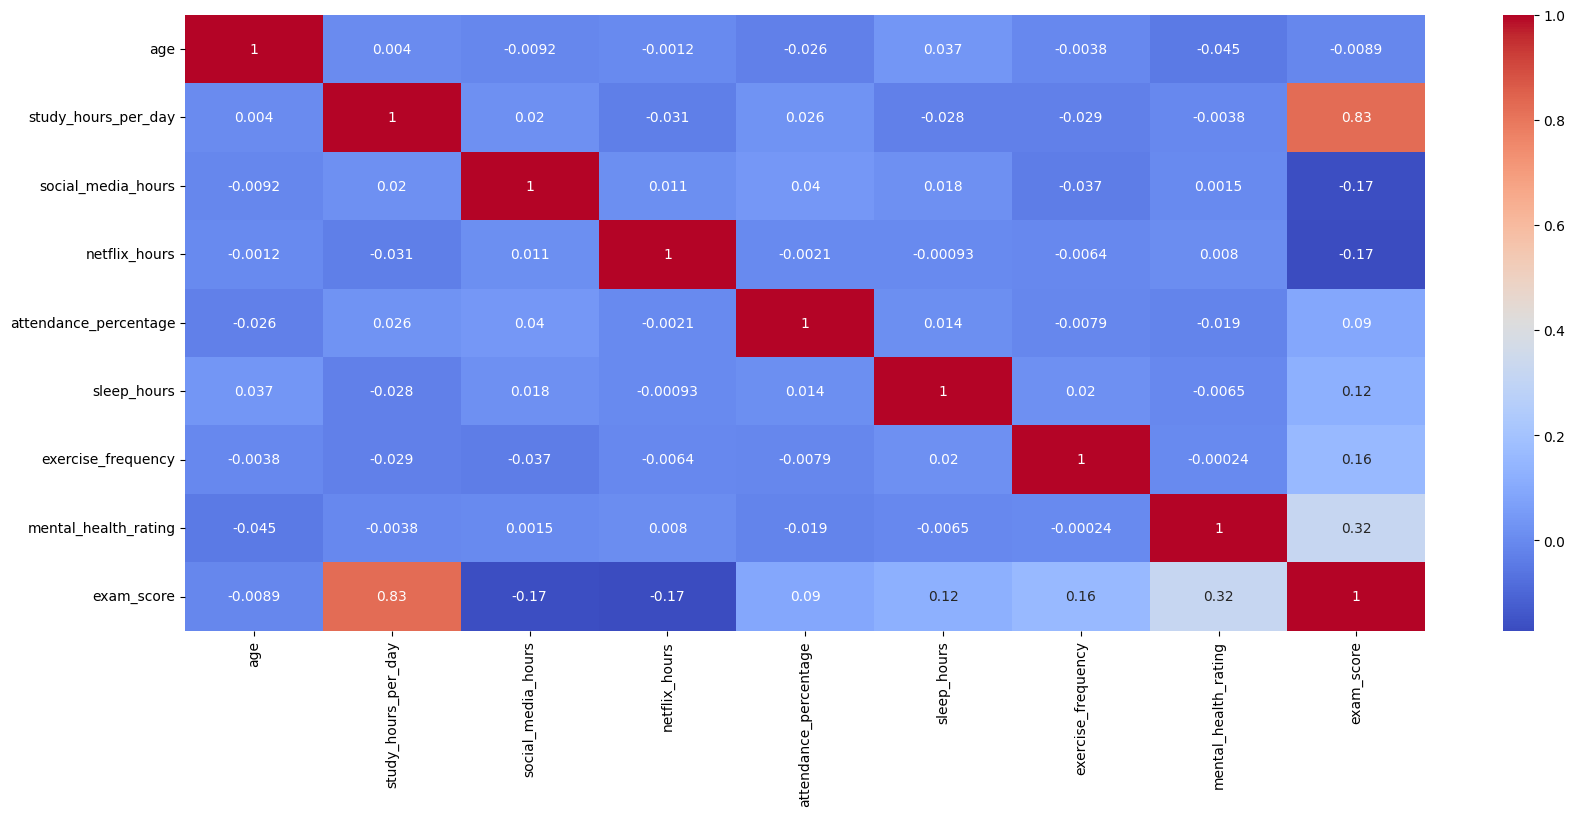

In [11]:
# Then
plt.figure(figsize=(20,8))
sns.heatmap(numaric_columns.corr(),annot=True,cmap='coolwarm')
plt.show('correlation heatmap')
plt.show()

***This will help us very well in Data Transformation and Reduction stage, and now we know from it that there are features that don't have impact in our target as attendance_percentage feature and there are features have very high impact as study_hours_per_day***

In [12]:
print('numercal feature shape',numaric_columns.shape,'\ncategorical feature shape',categorical_columns.shape)

numercal feature shape (1000, 9) 
categorical feature shape (1000, 7)


# 4 - Data Cleaning
Our mission here now is gradually to:

1- removing duplicate data

2- deleate outlairs

3- deal with NAN

4- make encoding to Cat feature


## 4.1 removing duplicate


In [13]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

No duplicates

In [14]:
# Remove duplicates
# df = df.drop_duplicates()

## 4.2 Deal with outliers

age


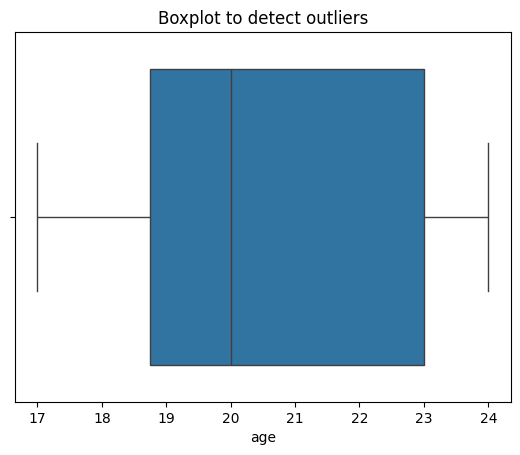

study_hours_per_day


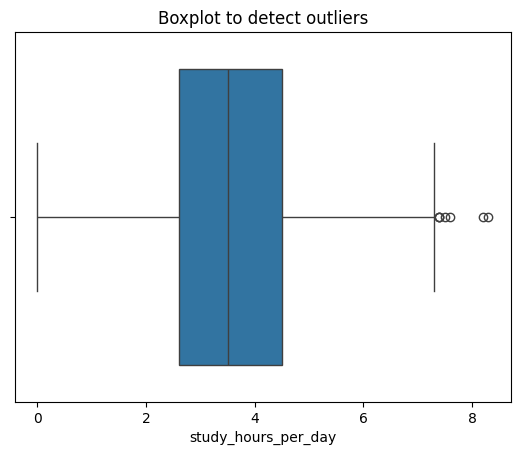

social_media_hours


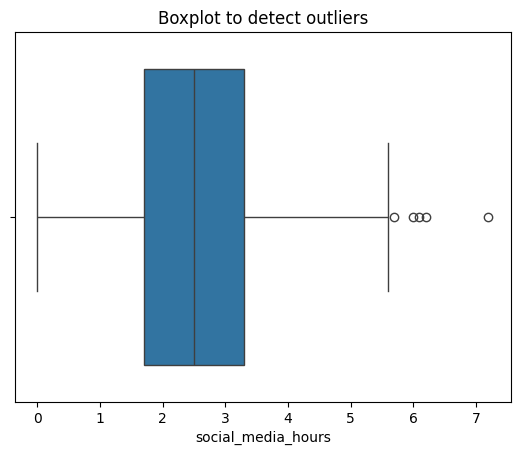

netflix_hours


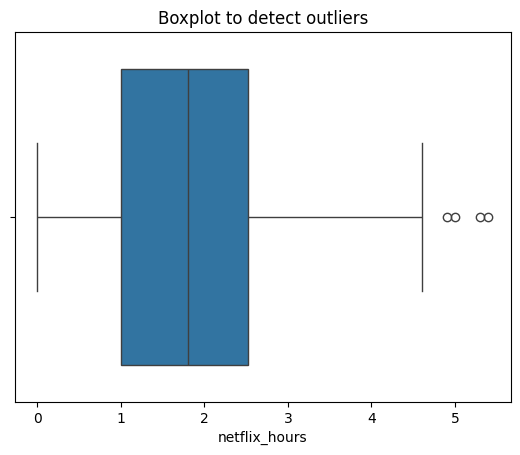

attendance_percentage


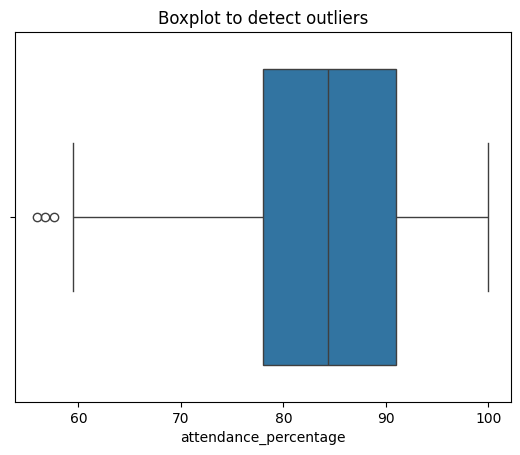

sleep_hours


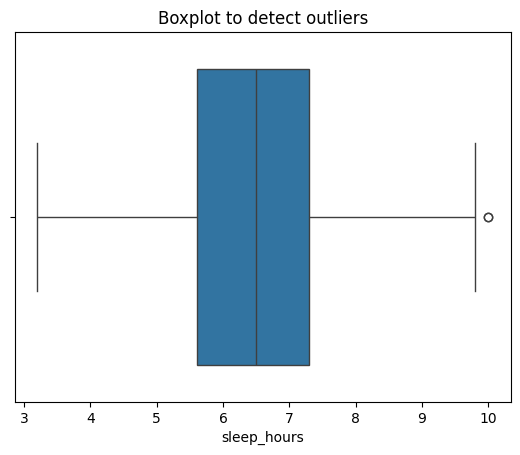

exercise_frequency


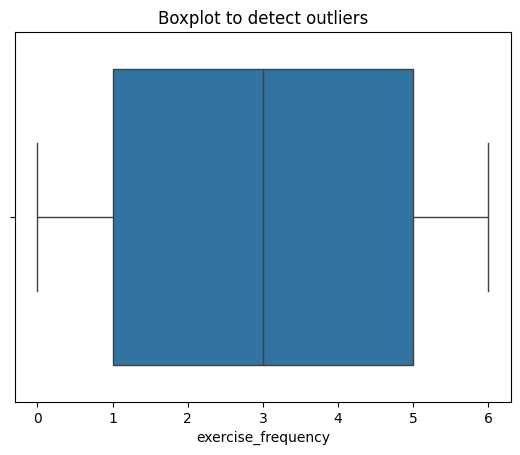

mental_health_rating


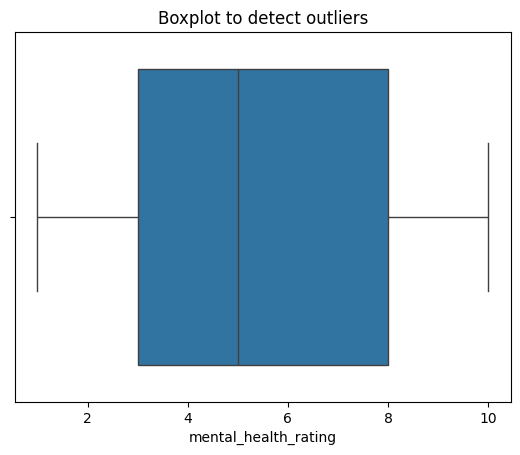

exam_score


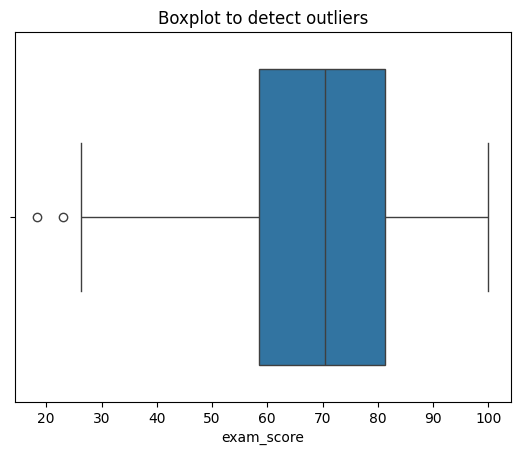

In [15]:
# Detecting outliers  in features
for i in numaric_columns.columns:
    print(i)
    sns.boxplot(x=df[str(i)])
    plt.title("Boxplot to detect outliers")
    plt.show()

Okay,we have outliers in almost of my data.
[exam score, sleep hours, attandance, netflix hours, social media hours, study hours]

In [16]:
# Split data into numerical and categorical
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]


In [17]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [18]:
# Handle outliers using percentile method
def remove_outliers_columnwise(df, lower_quantile=0.25, upper_quantile=0.75, iqr_factor=1.5):
    df_clean = df.copy()

    for col in df.columns:
        Q1 = df[col].quantile(lower_quantile)
        Q3 = df[col].quantile(upper_quantile)
        IQR = Q3 - Q1

        lower_bound = Q1 - iqr_factor * IQR
        upper_bound = Q3 + iqr_factor * IQR

        # Set outliers to NaN
        df_clean[col] = df[col].where((df[col] >= lower_bound) & (df[col] <= upper_bound), np.nan)

    return df_clean


df_numerical_clean = remove_outliers_columnwise(df_numerical)

df_clean = pd.concat([df_numerical_clean, df_categorical], axis=1)



It calculates the IQR bounds for that column.

It replaces outlier values (outside bounds) with NaN, leaving the rest of the row untouched.

This is useful if you want to:

    Later impute missing values (NaN) instead of dropping rows entirely.

In [19]:
df_clean.isna().sum()

,0
age,0
study_hours_per_day,7
social_media_hours,5
netflix_hours,4
attendance_percentage,3
sleep_hours,2
exercise_frequency,0
mental_health_rating,0
exam_score,2
student_id,0


age


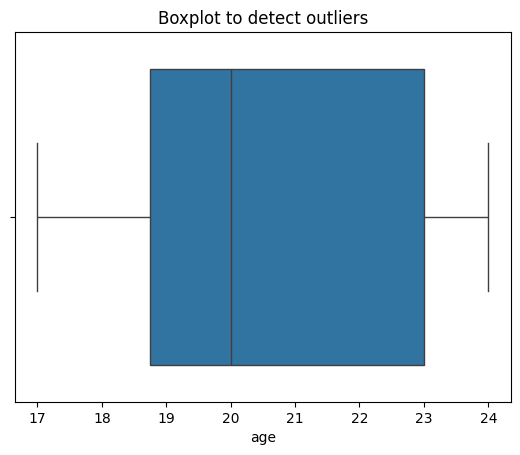

study_hours_per_day


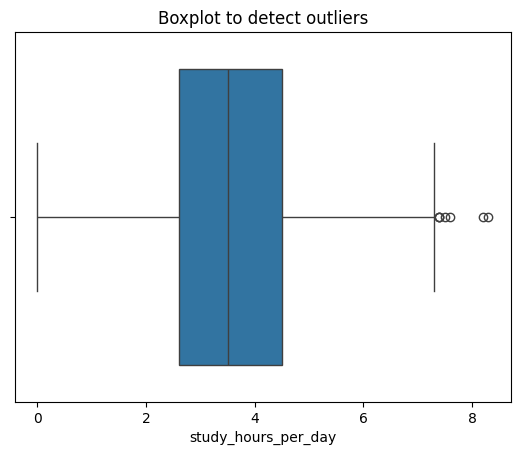

social_media_hours


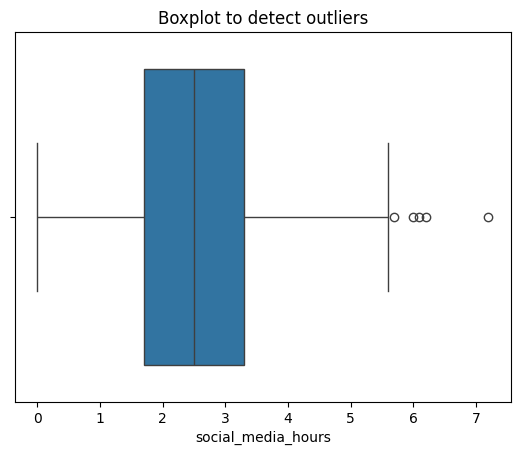

netflix_hours


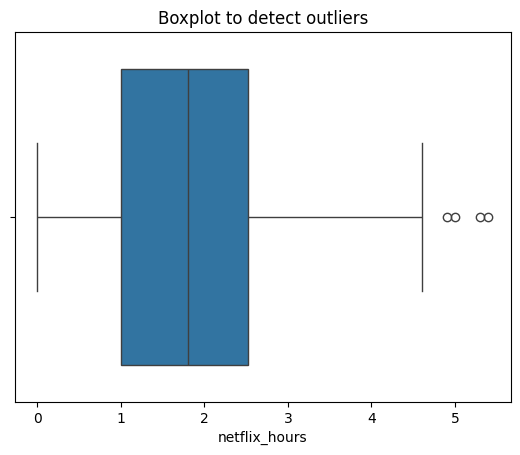

attendance_percentage


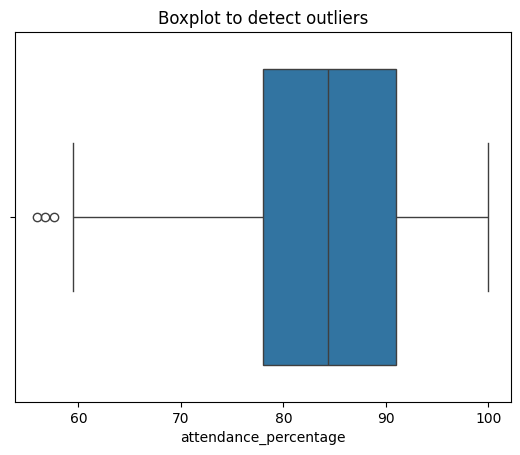

sleep_hours


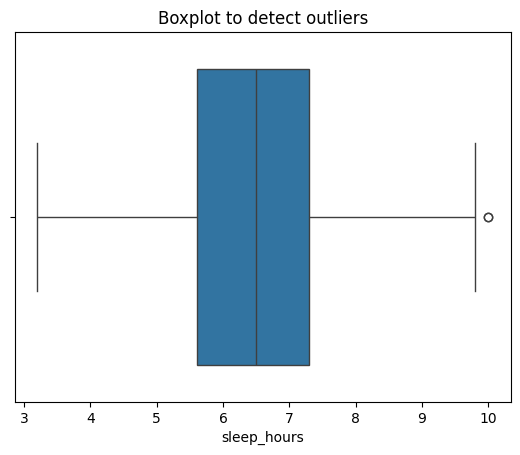

exercise_frequency


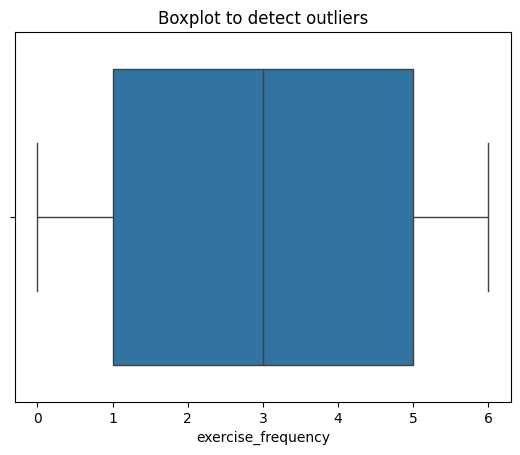

mental_health_rating


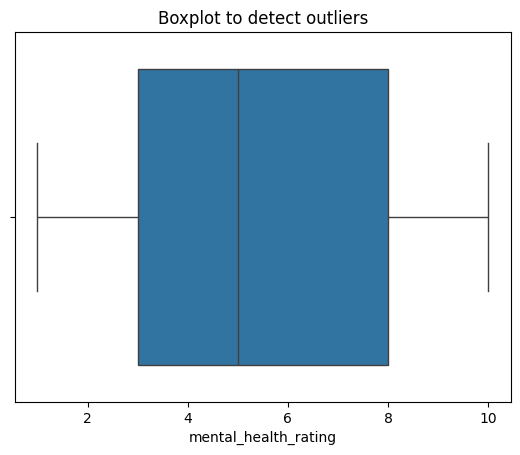

exam_score


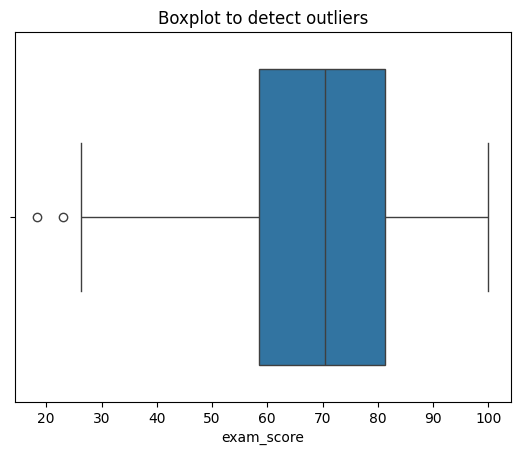

In [20]:
for i in numaric_columns.columns:
    print(i)
    sns.boxplot(x=df[str(i)])
    plt.title("Boxplot to detect outliers")
    plt.show()

In [21]:
df_clean

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,S1000,Female,No,Fair,Master,Average,Yes
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,S1001,Female,No,Good,High School,Average,No
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,S1002,Male,No,Poor,High School,Poor,No
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,S1003,Female,No,Poor,Master,Good,Yes
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,S1004,Female,No,Fair,Master,Good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,S1995,Female,No,Fair,High School,Good,Yes
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,S1996,Female,Yes,Poor,High School,Average,Yes
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,S1997,Male,No,Good,Bachelor,Good,Yes
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,S1998,Male,Yes,Fair,Bachelor,Average,No


## 4.3 Deal with nulls
i) Seeing if missing data more than 10% of rows so remove feature.

ii) If else impute with mean for numerical data and mode for else.



In [22]:
df_clean.isna().sum()

,0
age,0
study_hours_per_day,7
social_media_hours,5
netflix_hours,4
attendance_percentage,3
sleep_hours,2
exercise_frequency,0
mental_health_rating,0
exam_score,2
student_id,0


In [23]:
# For the 'study_hours_per_day' column : we will impute it by mean as it's numerical data
df_clean['study_hours_per_day'].fillna(df_clean['study_hours_per_day'].mean(), inplace=True)

<ipython-input-23-c9353da33b99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['study_hours_per_day'].fillna(df_clean['study_hours_per_day'].mean(), inplace=True)


In [24]:
# social_media_hours, the same
df_clean['social_media_hours'].fillna(df_clean['social_media_hours'].mean(), inplace=True)

<ipython-input-24-323974157e98>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['social_media_hours'].fillna(df_clean['social_media_hours'].mean(), inplace=True)


In [25]:
# netflix_hours
df_clean['netflix_hours'].fillna(df_clean['netflix_hours'].mean(), inplace=True)

<ipython-input-25-e57724d66634>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['netflix_hours'].fillna(df_clean['netflix_hours'].mean(), inplace=True)


In [26]:
# attendance_percentage
df_clean['attendance_percentage'].fillna(df_clean['attendance_percentage'].mean(), inplace=True)

<ipython-input-26-4feeb431a582>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['attendance_percentage'].fillna(df_clean['attendance_percentage'].mean(), inplace=True)


In [27]:
 # sleep_hours
 df_clean['sleep_hours'].fillna(df_clean['sleep_hours'].mean(), inplace=True)

<ipython-input-27-54a88a1201ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['sleep_hours'].fillna(df_clean['sleep_hours'].mean(), inplace=True)


In [28]:
# exam_score
df_clean['exam_score'].fillna(df_clean['exam_score'].mean(), inplace=True)

<ipython-input-28-a4decfbf5ea7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['exam_score'].fillna(df_clean['exam_score'].mean(), inplace=True)


In [29]:
# For parental_education_level feature: this column is categorical
df_clean['parental_education_level'].fillna(df_clean['parental_education_level'].mode()[0], inplace=True)

<ipython-input-29-5fc37655436a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['parental_education_level'].fillna(df_clean['parental_education_level'].mode()[0], inplace=True)


## 4.4 Encoding

In [30]:
# Checking categorical data
df[categorical_columns.columns]

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,S1000,Female,No,Fair,Master,Average,Yes
1,S1001,Female,No,Good,High School,Average,No
2,S1002,Male,No,Poor,High School,Poor,No
3,S1003,Female,No,Poor,Master,Good,Yes
4,S1004,Female,No,Fair,Master,Good,No
...,...,...,...,...,...,...,...
995,S1995,Female,No,Fair,High School,Good,Yes
996,S1996,Female,Yes,Poor,High School,Average,Yes
997,S1997,Male,No,Good,Bachelor,Good,Yes
998,S1998,Male,Yes,Fair,Bachelor,Average,No


In [31]:
df_clean= df_clean.drop(columns=['student_id'])

In [32]:
# Encoding Categorical Features

# One-hot encoding for categorical features
df_clean = pd.get_dummies(df_clean)

In [33]:
df_clean

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Female,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,True,...,False,False,False,False,True,True,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,True,...,True,False,False,True,False,True,False,False,True,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,False,...,False,True,False,True,False,False,False,True,True,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,True,...,False,True,False,False,True,False,True,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,True,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,True,...,False,False,False,True,False,False,True,False,False,True
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,True,...,False,True,False,True,False,True,False,False,False,True
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,False,...,True,False,True,False,False,False,True,False,False,True
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,False,...,False,False,True,False,False,True,False,False,True,False


# 5 - Data Transformation and Reduction
Data transformation changes the format, structure, or values of the data and converts them into clean, usable data .

1- Attribute construction: Purpose Create new meaningful features

2- Data Normalization: scaling the data values to a much smaller range

3- Dimensionality reduction: Drop unimpactable features





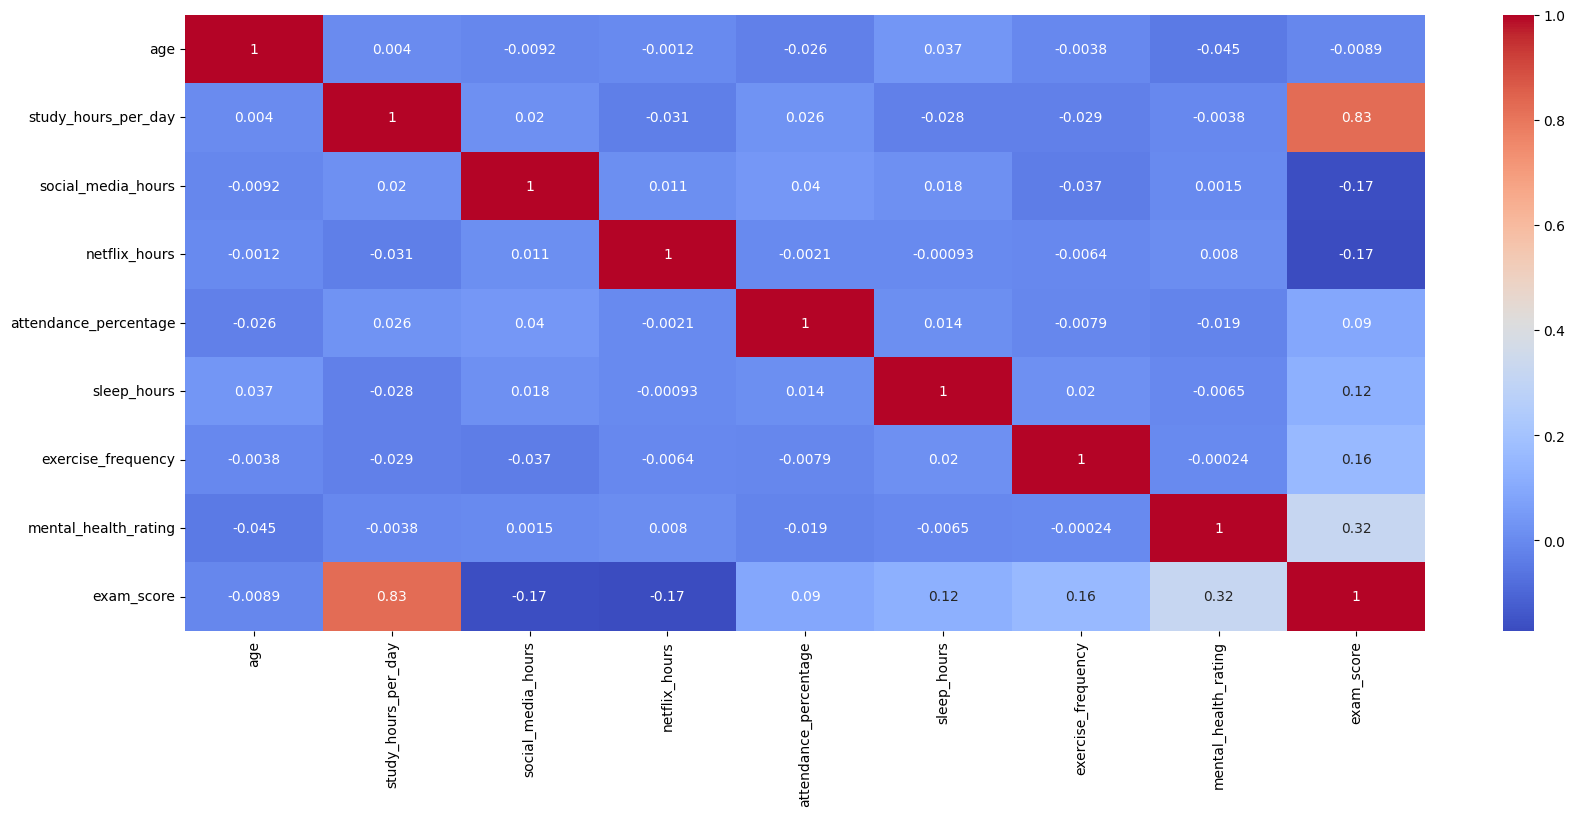

## 5.1 Attribute construction

1-Sleep Efficiency

    Formula: sleep_hours / 8 (assuming 8 hours is ideal)

    Purpose: Normalizes sleep hours to a standard benchmark for comparison.

lifestyle_balance_score

```
lifestyle_balance_score = exercise_frequency + sleep_hours + mental_health_rating
```





In [34]:
# Add sleep efficiency feature
df_clean['sleep_efficiency'] = df_clean['sleep_hours'] / 8

# Add social distraction feature
df_clean['lifestyle_balance_score'] = df_clean['exercise_frequency'] + df_clean['sleep_hours'] + df_clean['mental_health_rating']

## 5.2 Data Normalization

In [35]:
# normalize data by dividing all values by the sum of values.
df_normalized = df_clean.div(df_clean.sum(axis=1), axis=0)

## 5.3 Dimensionality reduction

1-age as the very little impact

2-netflix hours as it have the same impact to social media hours



In [36]:
# drop age
df_normalized = df_clean.drop(columns=['age'])

# drop netflix hours
df_normalized = df_clean.drop(columns=['netflix_hours'])

#  6 - Statistical Analysis


In [37]:
y = df_normalized['exam_score']
x = df_normalized.drop(columns=['exam_score'])

In [38]:
# Basic statistics
print("Mean:", np.mean(y))
print("Median:", np.median(y))
print("Std Dev:", np.std(y))
print("Skewness:", y.skew())

Mean: 69.6993987975952
Median: 70.5
Std Dev: 16.737527285691815
Skewness: -0.1278073017536713


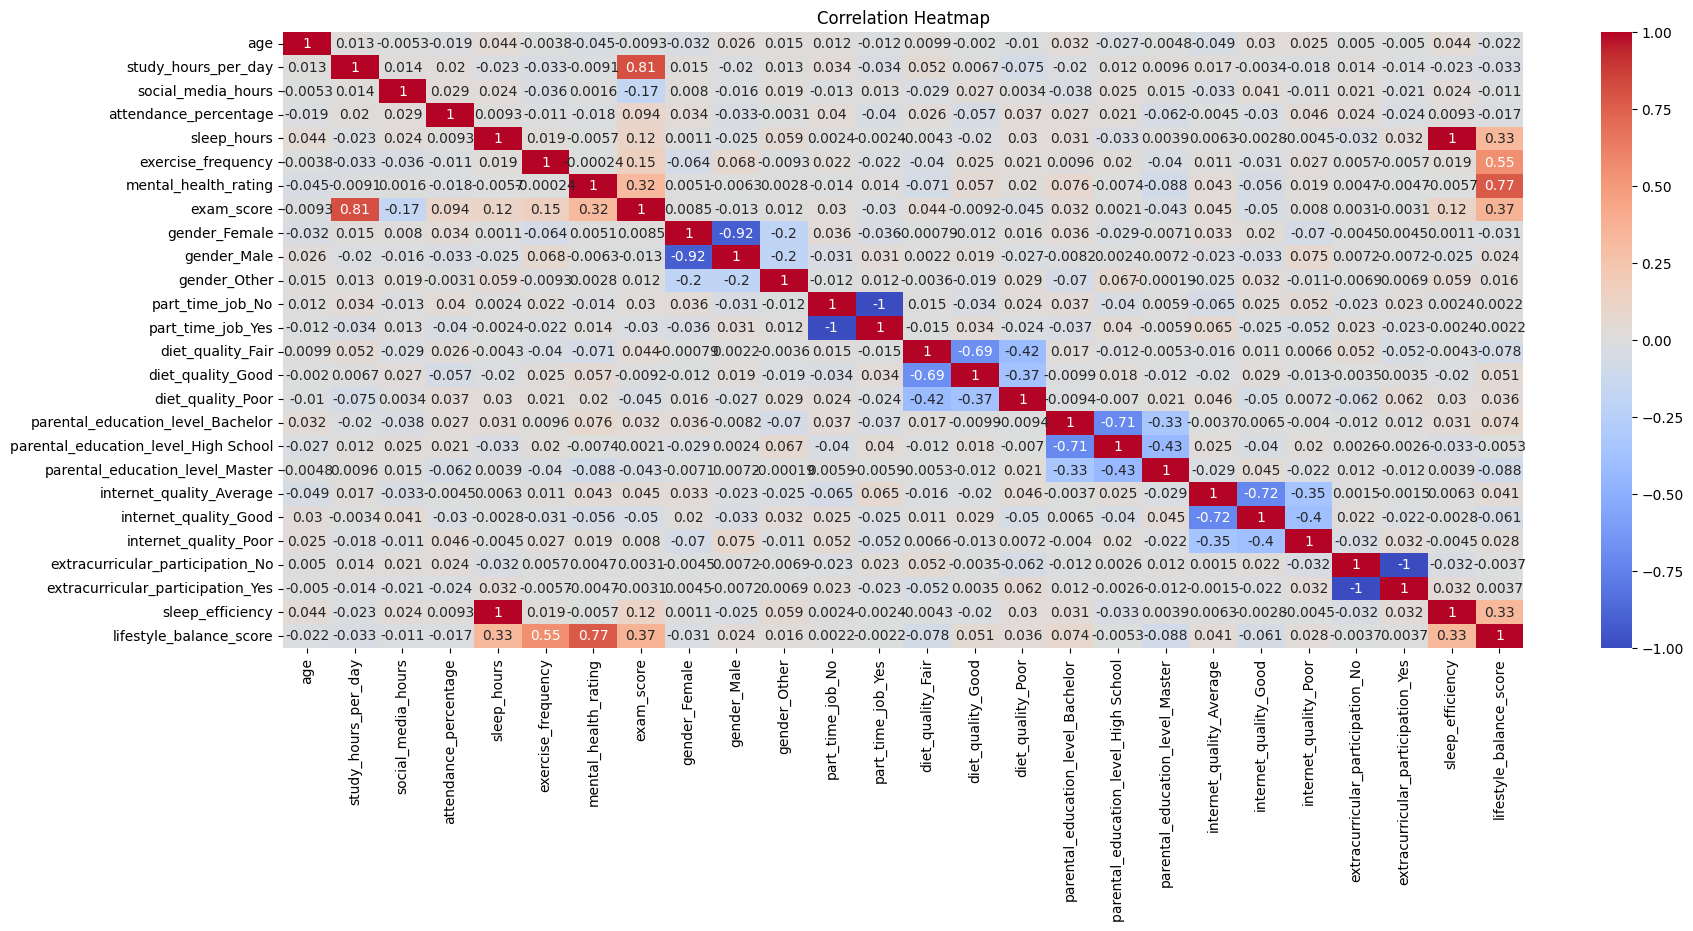

In [39]:
# Correlation heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df_normalized.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
corr = df_normalized.corr()
exam_corr = corr['exam_score'].drop('exam_score')  # نحذف الارتباط مع نفسه

# أعلى القيم ارتباطاً إيجابياً
print(" High Correlations with exam_score (TARGET):")
for feature, value in exam_corr.items():
    if value > 0.1 or value < -0.1:
        print(f"{feature} = {value:.2f}")

 High Correlations with exam_score (TARGET):
study_hours_per_day = 0.81
social_media_hours = -0.17
sleep_hours = 0.12
exercise_frequency = 0.15
mental_health_rating = 0.32
sleep_efficiency = 0.12
lifestyle_balance_score = 0.37


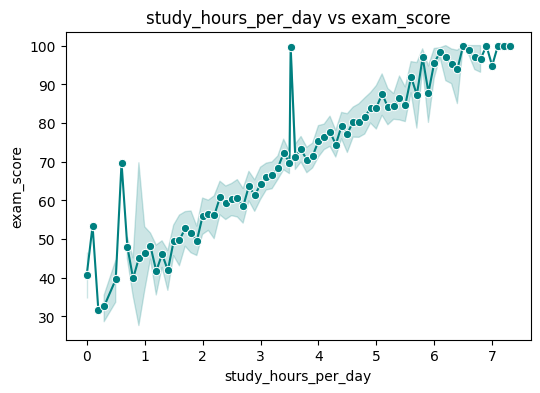

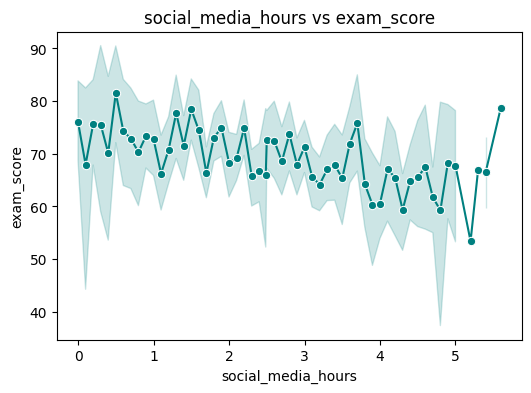

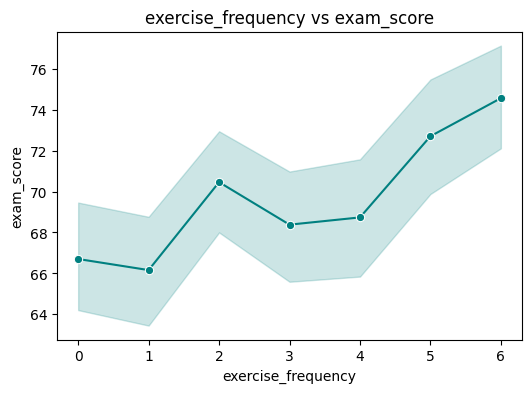

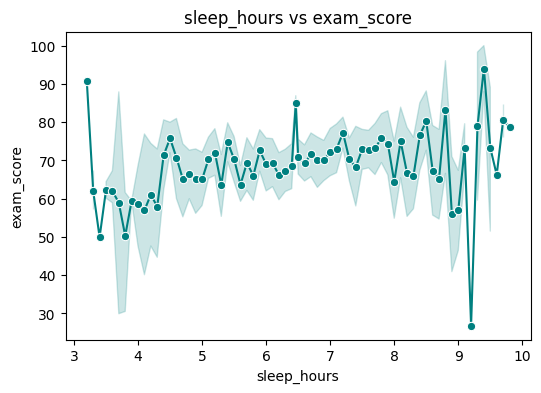

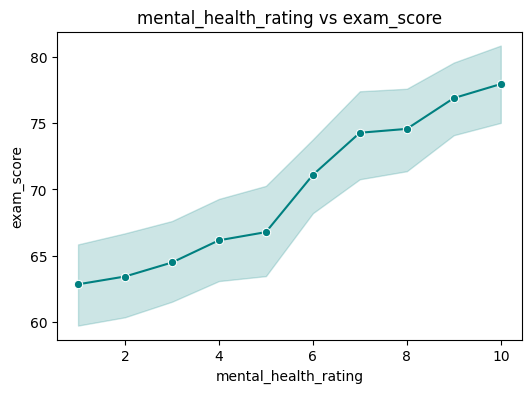

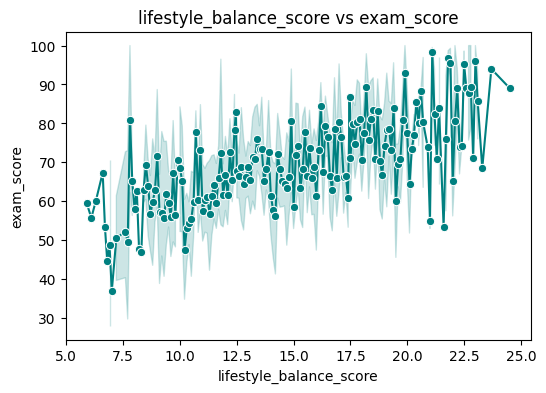

In [41]:
features = ['study_hours_per_day', 'social_media_hours', 'exercise_frequency','sleep_hours', 'mental_health_rating','lifestyle_balance_score']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.lineplot(x=df_clean[feature], y=df_clean['exam_score'], marker='o', color='teal')
    plt.title(f'{feature} vs exam_score')
    plt.xlabel(feature)
    plt.ylabel('exam_score')
    plt.show()

# 7-ML Classification

In [44]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data to model
X = df_normalized[features]
y = df_clean['exam_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Test The model
y_pred = lin_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 44.75969451452372


In [47]:
# New data instant
new_data = pd.DataFrame({
    'study_hours_per_day': [3.5],
    'social_media_hours': [6],
    'exercise_frequency': [5],
    'sleep_hours': [8],
    'mental_health_rating': [7],
    'lifestyle_balance_score': [15]
})

# prediction
predicted_score = lin_reg.predict(new_data)[0]
predicted_score

np.float64(62.19938713216949)